Lab based on: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#About

# Step 1 : Reading and understanding Train and Test Data set¶


In [1]:
!pip install seaborn

In [2]:
#Loading Packages
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

train_original = pd.read_csv("input/train_ctrUa4K.csv")
train = train_original
train.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Reading the name of columns in data set 
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test = pd.read_csv("input/test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
#Reading the name of columns in data set 
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# What are the data types present in the data?

R: Los tipos de datos presentes en la base de datos desde Loan_ID hasta Self_Employed son de tipo object que en este caso representan una String, AplicantIncome y CoapplicantIncome son Integer, desde LoanAmount hasta Credit_History son Float y por último Property_Area es de tipo object (String).

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Count, and treat outliers and missing values

In [7]:
missing_values = train.isna().sum()
missing_values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
gender_mode = train['Gender'].mode()[0]
married_mode = train['Married'].mode()[0]
self_employed_mode = train['Self_Employed'].mode()[0]
dependents_mode = train['Dependents'].mode()[0]
credit_history_mode = train['Credit_History'].mode()[0]

In [9]:
train['Gender'] = train['Gender'].fillna(gender_mode)
train['Married'] = train['Married'].fillna(married_mode)
train['Self_Employed'] = train['Self_Employed'].fillna(self_employed_mode)
train['Dependents'] = train['Dependents'].fillna(dependents_mode)
train['Credit_History'] = train['Credit_History'].fillna(credit_history_mode)

In [10]:
loan_amount_mean = train['LoanAmount'].mean()
loan_amount_term_mean = train['Loan_Amount_Term'].mean()

In [11]:
train['LoanAmount'] = train['LoanAmount'].fillna(loan_amount_mean)
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(loan_amount_term_mean)

In [12]:
missing_values = train.isna().sum()
missing_values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Format Correction

In [13]:
train = train.convert_dtypes()

In [14]:
train['Dependents'] = train['Dependents'].replace('3+', '3')

train['Dependents'] = train['Dependents'].astype('Int64')
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('Int64')
train['CoapplicantIncome'] = train['CoapplicantIncome'].astype('Int64')
train['LoanAmount'] = train['LoanAmount'].astype('Int64')
train['Credit_History']= train['Credit_History'].astype('string[python]')

In [15]:
train.dtypes

Loan_ID              string[python]
Gender               string[python]
Married              string[python]
Dependents                    Int64
Education            string[python]
Self_Employed        string[python]
ApplicantIncome               Int64
CoapplicantIncome             Int64
LoanAmount                    Int64
Loan_Amount_Term              Int64
Credit_History       string[python]
Property_Area        string[python]
Loan_Status          string[python]
dtype: object


# Univariate Analysis
It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable

## visualize features of the data set by graph and get the analysis

## Study categorical features such as Gender, Married, Self_Employed and Credit_History

## visualize the numerical variables: distribution of Applicant income first.

# Gender

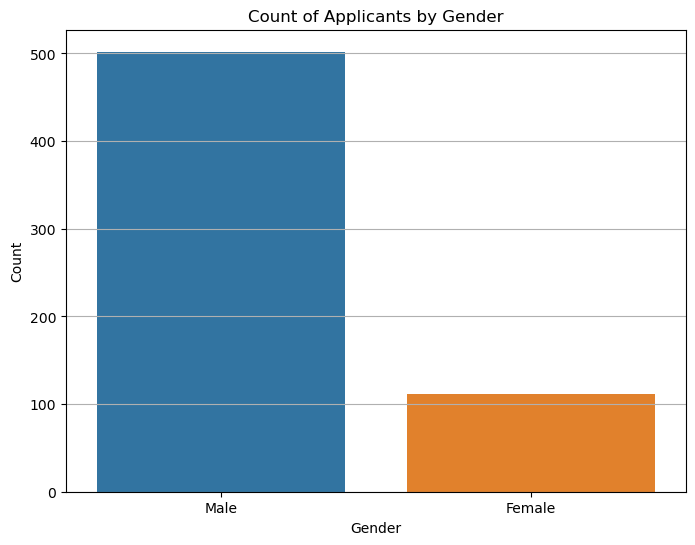

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=train)
plt.title('Count of Applicants by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [17]:
gender_frequency = train['Gender'].value_counts()
gender_frequency

Gender
Male      502
Female    112
Name: count, dtype: Int64

# Married

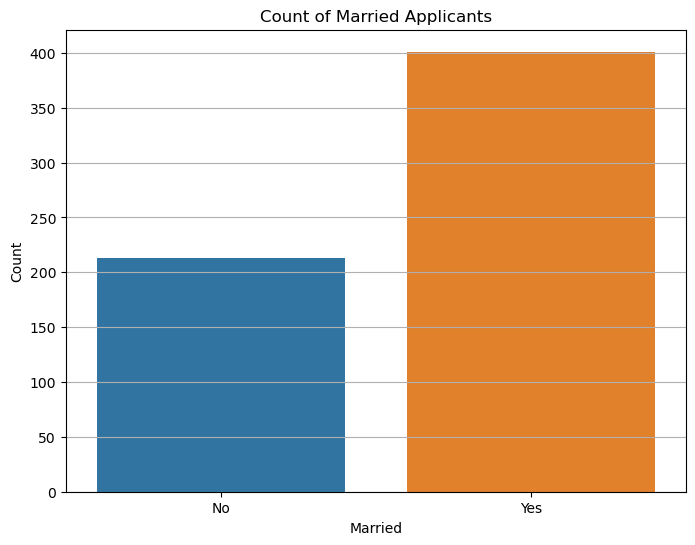

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Married', data=train)
plt.title('Count of Married Applicants')
plt.xlabel('Married')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [19]:
married_frequency = train['Married'].value_counts()
married_frequency

Married
Yes    401
No     213
Name: count, dtype: Int64

# Self Employed

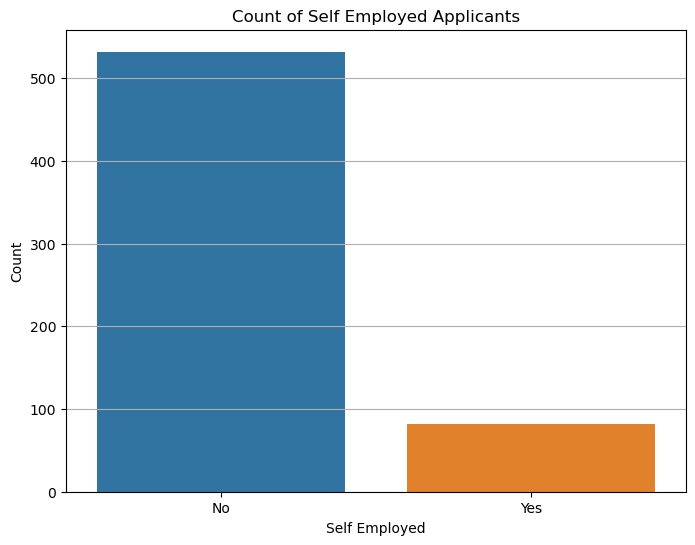

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Self_Employed', data=train)
plt.title('Count of Self Employed Applicants')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [21]:
self_employed_frequency = train['Self_Employed'].value_counts()
self_employed_frequency

Self_Employed
No     532
Yes     82
Name: count, dtype: Int64

# Credit History

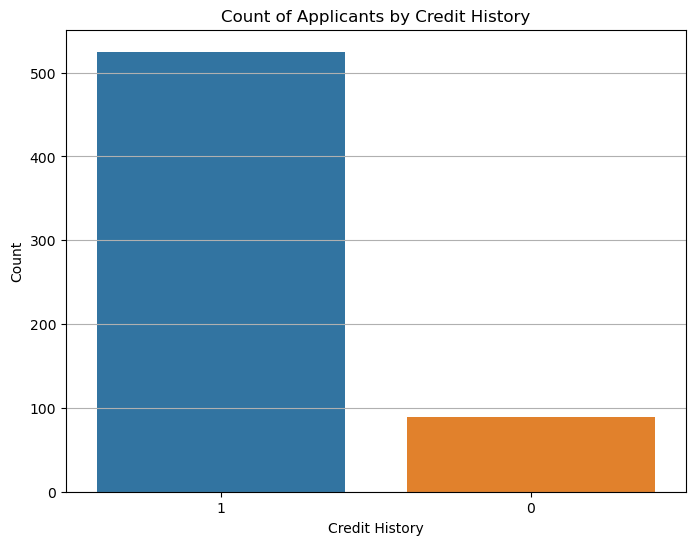

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_History', data=train)
plt.title('Count of Applicants by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [23]:
credit_history_frequency = train['Credit_History'].value_counts()
credit_history_frequency

Credit_History
1    525
0     89
Name: count, dtype: Int64

# Applicant Income

C:\Users\samhe\AppData\Local\Temp\ipykernel_22428\2112431605.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome'], bins=30, color='blue', kde=True)


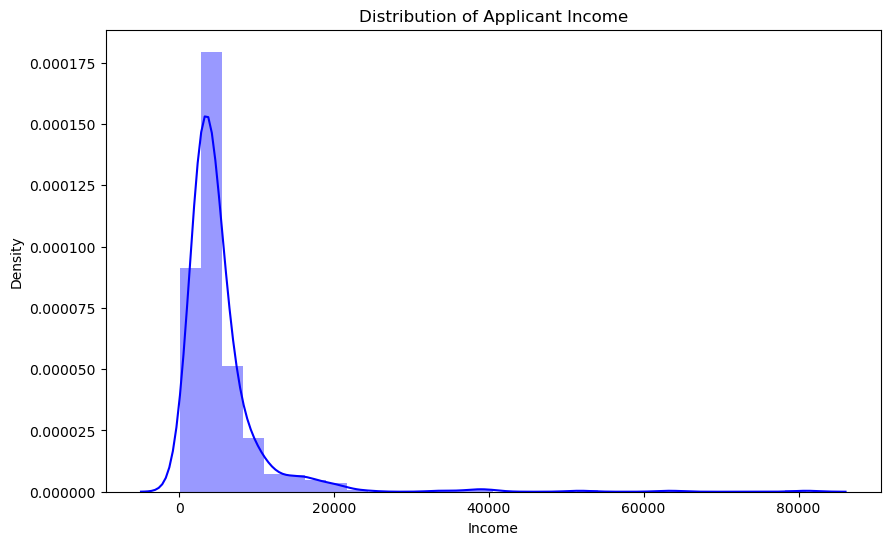

In [27]:
plt.figure(figsize=(10, 6))
sns.distplot(train['ApplicantIncome'], bins=30, color='blue', kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()


In [ ]:
applicant_income_stats = train['ApplicantIncome'].describe()

skewness = train['ApplicantIncome'].skew()
kurtosis = train['ApplicantIncome'].kurt()

(applicant_income_stats, skewness, kurtosis)

# Bivariate Analysis
Analyse the independent variable with respect to target variable. 

## Use bar plots to vizualice Gender vs Loan_Status, Education vs Loan_Status, Property_Area vs Loan_Status

## identify the most correlated variables to Loan_Status

## Identify, count and treat outliers and missing values

# Gender vs Loan Status

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=train)
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [ ]:
gender_loan_status = train.groupby('Gender')['Loan_Status'].value_counts(normalize=True).unstack() * 100
gender_loan_status

# Education vs Loan Status

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Loan_Status', data=train)
plt.title('Loan Status by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [ ]:
education_loan_status = train.groupby('Education')['Loan_Status'].value_counts(normalize=True).unstack() * 100
education_loan_status

# Property Area vs Loan Status

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=train)
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [ ]:
property_area_loan_status = train.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).unstack() * 100
property_area_loan_status

# Correlation Matrix

In [ ]:
train['Loan_Status_numeric'] = train['Loan_Status'].map({'Y': 1, 'N': 0})


train['Gender_numeric'] = train['Gender'].map({'Male': 1, 'Female': 0})
train['Married_numeric'] = train['Married'].map({'Yes': 1, 'No': 0})
train['Education_numeric'] = train['Education'].map({'Graduate': 1, 'Not Graduate': 0})
train['Self_Employed_numeric'] = train['Self_Employed'].map({'Yes': 1, 'No': 0})
train['Property_Area_numeric'] = train['Property_Area'].map({'Urban': 2, 'Semi Urban': 1, 'Rural': 0})


correlation_matrix = train.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

In [ ]:
loan_status_correlations = correlation_matrix['Loan_Status_numeric'].sort_values(ascending=False)

loan_status_correlations = loan_status_correlations.drop('Loan_Status_numeric')

loan_status_correlations

La variable más correlacionada con Loan_Status es Credit_History

# Model Building 

## Using the train dataset you should be able to select the best model. 
## Use feature selection
## Cross validation
## Try different models such as:

1) Decision Tree Classifier
2) Random Forest Classifier
3) K-Nearest-Neighbors
4) Support Vector Classifier
5) XGBoost

The test dataset doesn't have target. You are provided with a sample submition file. It is necesary to generate such a file with the two best models you have and attach it to your report. 